In [1]:
import numpy as np;import pandas as pd;from sklearn.preprocessing import LabelEncoder
cancer=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wdbc.data',header=None)
X=cancer.iloc[:,2:]  ##Training set
y=cancer.iloc[:,1]  ###Labels
le=LabelEncoder()
y=le.fit_transform(y)
cancer

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)


#### Usando GridSearch para encontrar la mejor combinación de parametros que produzcan los mejores resultados.El estimador usado fue SVC. Para la selección del kernel solo se hizo uso de "linear" y el valor por defecto "rbf"

In [3]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns
from sklearn.model_selection import GridSearchCV;from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler;from sklearn.pipeline import make_pipeline

svc=make_pipeline(StandardScaler(),SVC(random_state=1))
params=[0.001,0.01,0.1,1,10,100]
param_grid=[{'svc__C':params,'svc__kernel':['linear','rbf'],'svc__gamma':params}]
gs=GridSearchCV(estimator=svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs=gs.fit(X_train,y_train)





In [4]:
from sklearn.metrics import accuracy_score
modelo=gs.best_estimator_
modelo.fit(X_train,y_train)
y_predict=modelo.predict(X_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

# Nested cross-validation. Tipo 5x2

In [5]:
from sklearn.model_selection import cross_val_score
gs=GridSearchCV(estimator=svc,param_grid=param_grid,cv=2,n_jobs=-1,scoring='accuracy')

scores=cross_val_score(gs,X=X_train,y=y_train,scoring='accuracy',n_jobs=-1,cv=5)
np.mean(scores)

0.9736263736263737

In [17]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=[{'max_depth': [1, 2, 3,4, 5, 6, 7, None],
'criterion':['gini', 'entropy']}],scoring='accuracy',cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
f'Score: {np.mean(scores):.3f} +/- {np.std(scores):.3f}'


'Score: 0.934 +/- 0.016'

#### Para el tipo de datos presentados el mejor estimador es SVC con una precisión de 97,4% ya que DTC obtuvo una precisión de 93,4% 

In [20]:
from sklearn.linear_model import LogisticRegression
grid=[{'logisticregression__C':[0.001,0.01,0.1,1,10,100],'logisticregression__penalty':['l1','l2'],
      'logisticregression__fit_intercept':[True,False],'logisticregression__random_state':np.arange(0,10)}]


estimator=make_pipeline(StandardScaler(),LogisticRegression())
gs=GridSearchCV(estimator=estimator,param_grid=grid,cv=10,n_jobs=-1,scoring='accuracy')
gs=gs.fit(X_train,y_train)

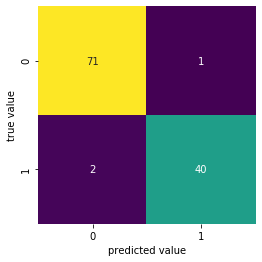

In [25]:
gs.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='viridis')
plt.xlabel('predicted value')
plt.ylabel('true value');